<a href="https://colab.research.google.com/github/hichanmedia/tiscon9/blob/main/3_3_z_date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 姿勢の大きさのデータ用いる方法の検証

### ライブラリのインストール

In [ ]:
!pip install opencv-python-headless matplotlib

### 画像の読み込み

Mounted at /content/drive


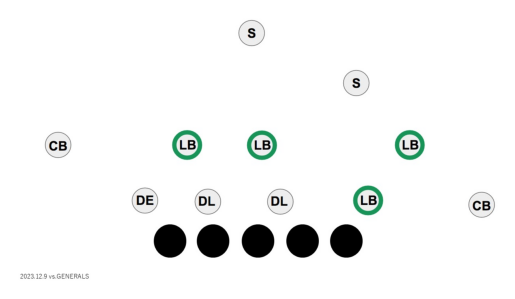

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Google ドライブをマウント
drive.mount('/content/drive')

# Google ドライブ内の画像ファイルのパスを指定
image_path = '/content/drive/My Drive/path/スライド11.JPG'
image = cv2.imread(image_path)
# output = image.copy()

# 画像が正しく読み込まれたか確認
if image is None:
    raise ValueError(f"画像の読み込みに失敗しました。パスを確認してください: {image_path}")

# 画像をBGRからRGBに変換して表示
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [ ]:
# 画像のサイズを取得
height, width, channels = image.shape
print(f"画像のサイズ: {width}x{height}, チャンネル数: {channels}")

画像のサイズ: 1280x720, チャンネル数: 3


### 画像の回転

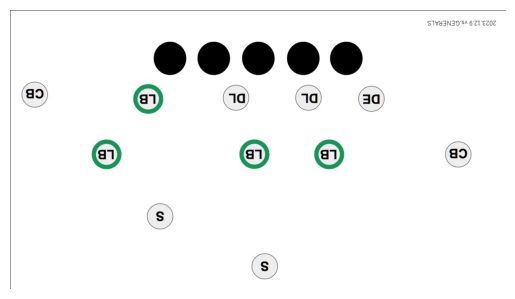

In [ ]:
# 画像の中心を基準に回転行列を作成
center = (image.shape[1] // 2, image.shape[0] // 2)
angle = 180  # 回転角度（度）
scale = 1.0  # スケール（1.0でそのままのサイズ）

# 回転行列を計算
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# 回転行列を使用して画像を回転
rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

# 回転後の画像をBGRからRGBに変換して表示
rotated_image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(rotated_image_rgb)
plt.axis('off')
plt.show()


### 画像のエッジ検出

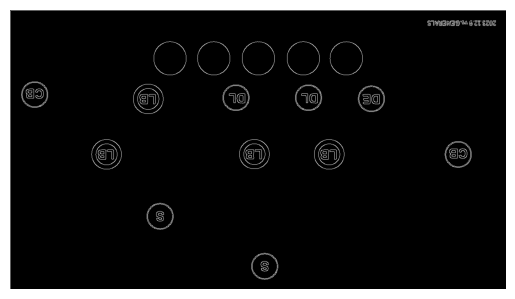

In [ ]:
# 回転後の画像でエッジ検出を実行
edges = cv2.Canny(rotated_image, 100, 200)

# エッジ検出結果を表示
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

### 丸を検出した順に数字のラベルを付けて、z座標を与える

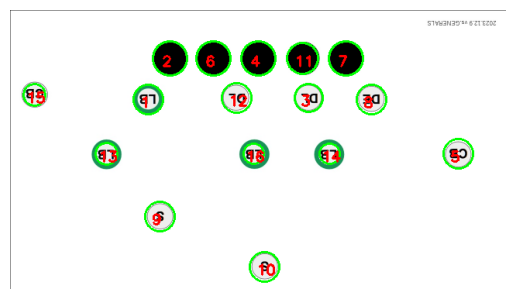

円 1 のz座標を入力してください: 450
円 2 のz座標を入力してください: 0
円 3 のz座標を入力してください: 300
円 4 のz座標を入力してください: 0
円 5 のz座標を入力してください: 450
円 6 のz座標を入力してください: 0
円 7 のz座標を入力してください: 0
円 8 のz座標を入力してください: 300
円 9 のz座標を入力してください: 450
円 10 のz座標を入力してください: 450
円 11 のz座標を入力してください: 0
円 12 のz座標を入力してください: 300
円 13 のz座標を入力してください: 450
円 14 のz座標を入力してください: 450
円 15 のz座標を入力してください: 450
円 16 のz座標を入力してください: 450
円 1: x=178, y=115, z=450.0, r=19
円 2: x=206, y=62, z=0.0, r=22
円 3: x=385, y=113, z=300.0, r=18
円 4: x=320, y=62, z=0.0, r=22
円 5: x=578, y=185, z=450.0, r=19
円 6: x=262, y=62, z=0.0, r=22
円 7: x=433, y=62, z=0.0, r=22
円 8: x=466, y=115, z=300.0, r=19
円 9: x=193, y=266, z=450.0, r=19
円 10: x=328, y=331, z=450.0, r=19
円 11: x=377, y=62, z=0.0, r=20
円 12: x=292, y=113, z=300.0, r=19
円 13: x=124, y=185, z=450.0, r=14
円 14: x=412, y=185, z=450.0, r=13
円 15: x=31, y=109, z=450.0, r=14
円 16: x=314, y=185, z=450.0, r=13


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像をリサイズして縮小
scale_percent = 50  # 画像サイズを50%に縮小
width = int(rotated_image.shape[1] * scale_percent / 100)
height = int(rotated_image.shape[0] * scale_percent / 100)
dim = (width, height)

# リサイズされた画像
resized_image = cv2.resize(rotated_image, dim, interpolation=cv2.INTER_AREA)

# 画像をグレースケールに変換
gray = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

# ガウシアンブラーで画像を平滑化（カーネルサイズを小さくする）
gray = cv2.GaussianBlur(gray, (5, 5), 2)

# Hough変換を用いて円を検出（dpなどのパラメータを調整）
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.5, minDist=50,
                           param1=30, param2=40, minRadius=10, maxRadius=100)

# 検出された円が存在する場合
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # z座標を格納するリスト
    z_coordinates = {}

    # 円に1から順に番号を付ける
    for i, (x, y, r) in enumerate(circles):
        cv2.circle(resized_image, (x, y), r, (0, 255, 0), 2)
        cv2.putText(resized_image, str(i+1), (x - 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    output_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)

    # 一度だけ画像を表示
    plt.imshow(output_rgb)
    plt.axis('off')
    plt.show()

    # 各円にz座標を手動で入力
    for i in range(len(circles)):
        z_value = float(input(f'円 {i+1} のz座標を入力してください: '))
        z_coordinates[i+1] = z_value

    # z座標を確認
    for i, (x, y, r) in enumerate(circles):
        print(f'円 {i+1}: x={x}, y={y}, z={z_coordinates[i+1]}, r={r}')

else:
    print("円が検出されませんでした。")


### ポジションのラベル付け

#### 座標のデータを保持

In [ ]:
# 円の座標を保存する辞書
circle_data = {}

# z座標を格納するリスト
for i, (x, y, r) in enumerate(circles):
    z_value = z_coordinates[i+1]  # z座標を辞書から取得
    circle_data[i+1] = {"x": x, "y": y, "z": z_value, "r": r}

# circle_dataにはすべての円の x, y, z, r 座標が保存される
print(circle_data)


{1: {'x': 178, 'y': 115, 'z': 450.0, 'r': 19}, 2: {'x': 206, 'y': 62, 'z': 0.0, 'r': 22}, 3: {'x': 385, 'y': 113, 'z': 300.0, 'r': 18}, 4: {'x': 320, 'y': 62, 'z': 0.0, 'r': 22}, 5: {'x': 578, 'y': 185, 'z': 450.0, 'r': 19}, 6: {'x': 262, 'y': 62, 'z': 0.0, 'r': 22}, 7: {'x': 433, 'y': 62, 'z': 0.0, 'r': 22}, 8: {'x': 466, 'y': 115, 'z': 300.0, 'r': 19}, 9: {'x': 193, 'y': 266, 'z': 450.0, 'r': 19}, 10: {'x': 328, 'y': 331, 'z': 450.0, 'r': 19}, 11: {'x': 377, 'y': 62, 'z': 0.0, 'r': 20}, 12: {'x': 292, 'y': 113, 'z': 300.0, 'r': 19}, 13: {'x': 124, 'y': 185, 'z': 450.0, 'r': 14}, 14: {'x': 412, 'y': 185, 'z': 450.0, 'r': 13}, 15: {'x': 31, 'y': 109, 'z': 450.0, 'r': 14}, 16: {'x': 314, 'y': 185, 'z': 450.0, 'r': 13}}


#### 座標に基づいてラベル付け

In [ ]:
# 画像の中心座標を計算
center_x, center_y = resized_image.shape[1] // 2, 0

# ラベルを付けるための関数
def assign_label(x, y, z):
    # 中心座標からのユークリッド距離を計算
        distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
        # 距離に基づいてラベルを付与
        if z < 400:
            return 'DL'
        elif x >= 300 and x < 980 and y < 300:
            return 'DL'
        elif distance < 350:
            return 'DL'
        elif distance >= 350 and distance <550 and y>=300:
            return 'LB'
        else:
            return 'DB'

# 各円に対してラベルを付ける
for i, data in circle_data.items():
    x = data["x"]
    y = data["y"]
    z = data["z"]

    # ラベルを付ける
    label = assign_label(x, y, z)
    circle_data[i]["label"] = label

# ラベル付きのデータを確認
for i, data in circle_data.items():
    print(f'円 {i}: x={data["x"]}, y={data["y"]}, z={data["z"]}, r={data["r"]}, ラベル={data["label"]}')


円 1: x=178, y=115, z=450.0, r=19, ラベル=DL
円 2: x=206, y=62, z=0.0, r=22, ラベル=DL
円 3: x=385, y=113, z=300.0, r=18, ラベル=DL
円 4: x=320, y=62, z=0.0, r=22, ラベル=DL
円 5: x=578, y=185, z=450.0, r=19, ラベル=DL
円 6: x=262, y=62, z=0.0, r=22, ラベル=DL
円 7: x=433, y=62, z=0.0, r=22, ラベル=DL
円 8: x=466, y=115, z=300.0, r=19, ラベル=DL
円 9: x=193, y=266, z=450.0, r=19, ラベル=DL
円 10: x=328, y=331, z=450.0, r=19, ラベル=DL
円 11: x=377, y=62, z=0.0, r=20, ラベル=DL
円 12: x=292, y=113, z=300.0, r=19, ラベル=DL
円 13: x=124, y=185, z=450.0, r=14, ラベル=DL
円 14: x=412, y=185, z=450.0, r=13, ラベル=DL
円 15: x=31, y=109, z=450.0, r=14, ラベル=DL
円 16: x=314, y=185, z=450.0, r=13, ラベル=DL


#### ラベルに基づく処理の追加

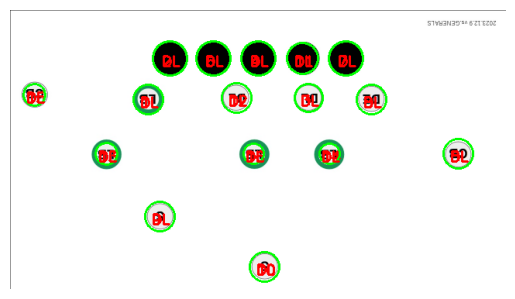

In [ ]:
# 画像上にラベルを描画する
for i, (x, y, r) in enumerate(circles):
    label = circle_data[i+1]["label"]

    # 円を描画
    cv2.circle(resized_image, (x, y), r, (0, 255, 0), 2)

    # ラベルを描画
    cv2.putText(resized_image, label, (x - 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# 画像を表示
output_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
plt.imshow(output_rgb)
plt.axis('off')
plt.show()


### メモ : 境界線によるラベル付け

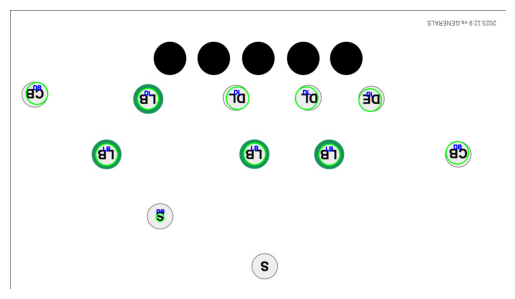

Label: LB, BBox: [x=824, y=373, r=27] is: 415.91
Label: DL, BBox: [x=356, y=229, r=27] is: 364.82
Label: LB, BBox: [x=631, y=371, r=28] is: 371.11
Label: LB, BBox: [x=249, y=373, r=28] is: 540.38
Label: DL, BBox: [x=765, y=227, r=29] is: 259.14
Label: DB, BBox: [x=69, y=215, r=28] is: 610.14
Label: DL, BBox: [x=587, y=227, r=29] is: 233.11
Label: DB, BBox: [x=1154, y=368, r=29] is: 632.16
Label: DL, BBox: [x=929, y=232, r=29] is: 370.60
Label: DB, BBox: [x=387, y=535, r=10] is: 591.81


In [ ]:
# 画像をグレースケールに変換
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# ハフ変換を用いて丸を検出
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=5, maxRadius=30)

# 検出された丸が存在する場合
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")

    # 画像の中心座標を計算
    center_x, center_y = rotated_image.shape[1] // 2, 0

    def predict_label(x, y):
        # 中心座標からのユークリッド距離を計算
        distance = np.sqrt((x - center_x)**2 + (y - center_y)**2)
        # 距離に基づいてラベルを付与
        if x >= 300 and x < 980 and y < 300:
            return 'DL'
        elif distance < 350:
            return 'DL'
        elif distance >= 350 and distance <550 and y>=300:
            return 'LB'
        else:
            return 'DB'

    # 検出された丸の位置座標を表示し、ラベルを予測して表示
    for (x, y, r) in circles:
        label = predict_label(x, y)
        cv2.putText(rotated_image, label, (x - 10, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
        cv2.circle(rotated_image, (x, y), r, (0, 255, 0), 2)

    # 画像をBGRからRGBに変換して表示
    image_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # 検出された丸の位置座標とラベルを表示
    for (x, y, r) in circles:
        label = predict_label(x, y)
        print(f'Label: {label}, BBox: [x={x}, y={y}, r={r}] is: {np.sqrt((x - center_x)**2 + (y - center_y)**2):.2f}')
else:
    print("丸が検出されませんでした。")

### メモ : 丸を検出した順に数字のラベル付け

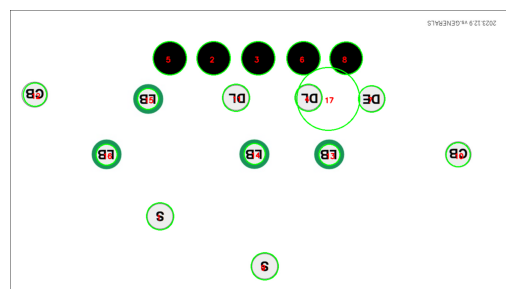

In [ ]:
# 画像をグレースケールに変換
gray = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)

# ガウシアンブラーで画像を平滑化
gray = cv2.GaussianBlur(gray, (9, 9), 2)

# Hough変換を用いて円を検出
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=50,
                           param1=50, param2=30, minRadius=10, maxRadius=100)

# 検出された円が存在する場合
if circles is not None:
    # 検出された円の数を取得
    circles = np.round(circles[0, :]).astype("int")

    # z座標を格納するリスト
    z_coordinates = {}

    # 円に1から順に番号を付ける
    for i, (x, y, r) in enumerate(circles):
        # 円を描画
        cv2.circle(rotated_image, (x, y), r, (0, 255, 0), 2)

        # 番号を円の中心に描画
        cv2.putText(rotated_image, str(i+1), (x - 10, y + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # 画像をBGRからRGBに変換して表示
    output_rgb = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(output_rgb)
    plt.axis('off')
    plt.show()

else:
    print("円が検出されませんでした。")

